## Phase Portraits

In this notebook we'll look at how to generate [phase portraits](https://en.wikipedia.org/wiki/Phase_portrait).
A phase diagram shows the trajectories that a dynamical system can take through its phase space. For any system that obeys the [markov property](https://en.wikipedia.org/wiki/Markov_property) we can construct such a diagram, with one dimension for each of the system's stocks.



## Ingredients

#### Libraries
In this analysis we'll use:

- **numpy** to create the grid of points that we'll sample over
- **matplotlib** via ipython's pylab magic to construct the quiver plot

In [1]:
%pylab inline
import pysd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


#### Example Model

A single pendulum makes for a great example of oscillatory behavior. The following model constructs equations of motion for the pendulum in radial coordinates, simplifying the model from one constructed in cartesian coordinates. In this model, the two state elements are the angle of the pendulum and the derivative of that angle, its angular velocity.

In [2]:
model = pysd.read_vensim('../../models/Pendulum/Single_Pendulum.mdl')

## Recipe

#### Step 1: Define the range over which to plot
We've defined the angle $0$ to imply that the pendulum is hanging straight down. To show the full range of motion, we'll show the angles ragning from $-1.5\pi$ to $+1.5\pi$, which will allow us to see the the points of stable and unstable equilibrium.

We also want to sample over a range of angular velocities that are reasonable for our system, for the given values of length and weight. 

In [3]:
angular_position = np.linspace(-1.5*np.pi, 1.5*np.pi, 60)
angular_velocity = np.linspace(-2, 2, 20)

Numpy's `meshgrid` lets us construct a 2d sample space based upon our arrays

In [4]:
apv, avv = np.meshgrid(angular_position, angular_velocity)

#### Step 2: Calculate the state space derivatives at a point
We'll define a helper function, which given a point in the state space, will tell us what the derivatives of the state elements will be. One way to do this is to run the model over a single timestep, and extract the derivative information. In this case, the model's stocks have only one inflow/outflow, so this is the derivative value.

As the derivative of the angular position is just the angular velocity, whatever we pass in for the `av` parameter should be returned to us as the derivative of `ap`.

In [5]:
def derivatives(ap, av):
    ret = model.run(params={'angular_position':ap,
                            'angular_velocity':av}, 
                    return_timestamps=[0,1],
                    return_columns=['change_in_angular_position',
                                    'change_in_angular_velocity'])

    return tuple(ret.loc[0].values)

derivatives(0,1)

(1.0, -0.0)

#### Step 3: Calculate the state space derivatives across our sample space

We can use numpy's `vectorize` to make the function accept the 2d sample space we have just created. Now we can generate the derivative of angular position vector `dapv` and that of the angular velocity vector `davv`. As before, the derivative of the angular posiiton should be equal to the angular velocity. We check that the vectors are equal.

In [6]:
vderivatives = np.vectorize(derivatives)

dapv, davv = vderivatives(apv, avv)
(dapv == avv).all()

True

#### Step 4: Plot the phase portrait

Now we have everything we need to draw the phase portrait. We'll use matplotlib's `quiver` function, which wants as arguments the grid of x and y coordinates, and the derivatives of these coordinates.

In the plot we see the locations of stable and unstable equilibria, and can eyeball the trajectories that the system will take through the state space by following the arrows.

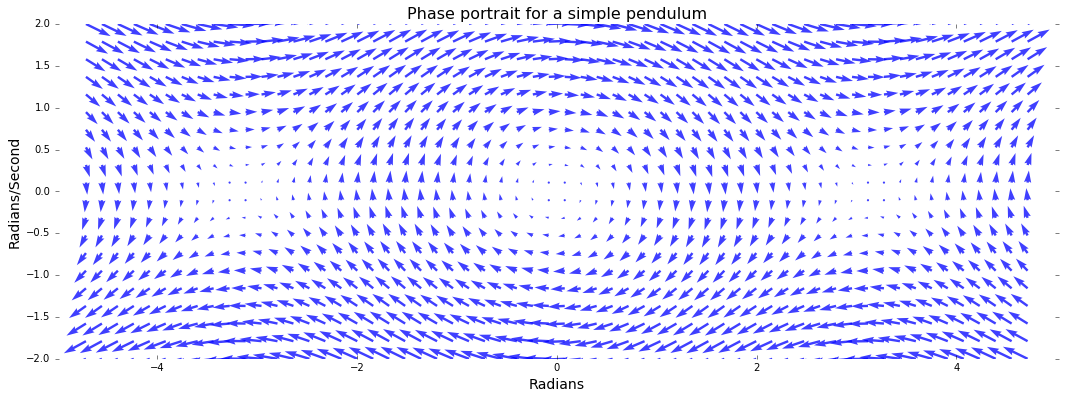

In [7]:
plt.figure(figsize=(18,6))
plt.quiver(apv, avv, dapv, davv, color='b', alpha=.75)
plt.box('off')
plt.xlim(-1.6*np.pi, 1.6*np.pi)
plt.xlabel('Radians', fontsize=14)
plt.ylabel('Radians/Second', fontsize=14)
plt.title('Phase portrait for a simple pendulum', fontsize=16);